### Tracking bird migration

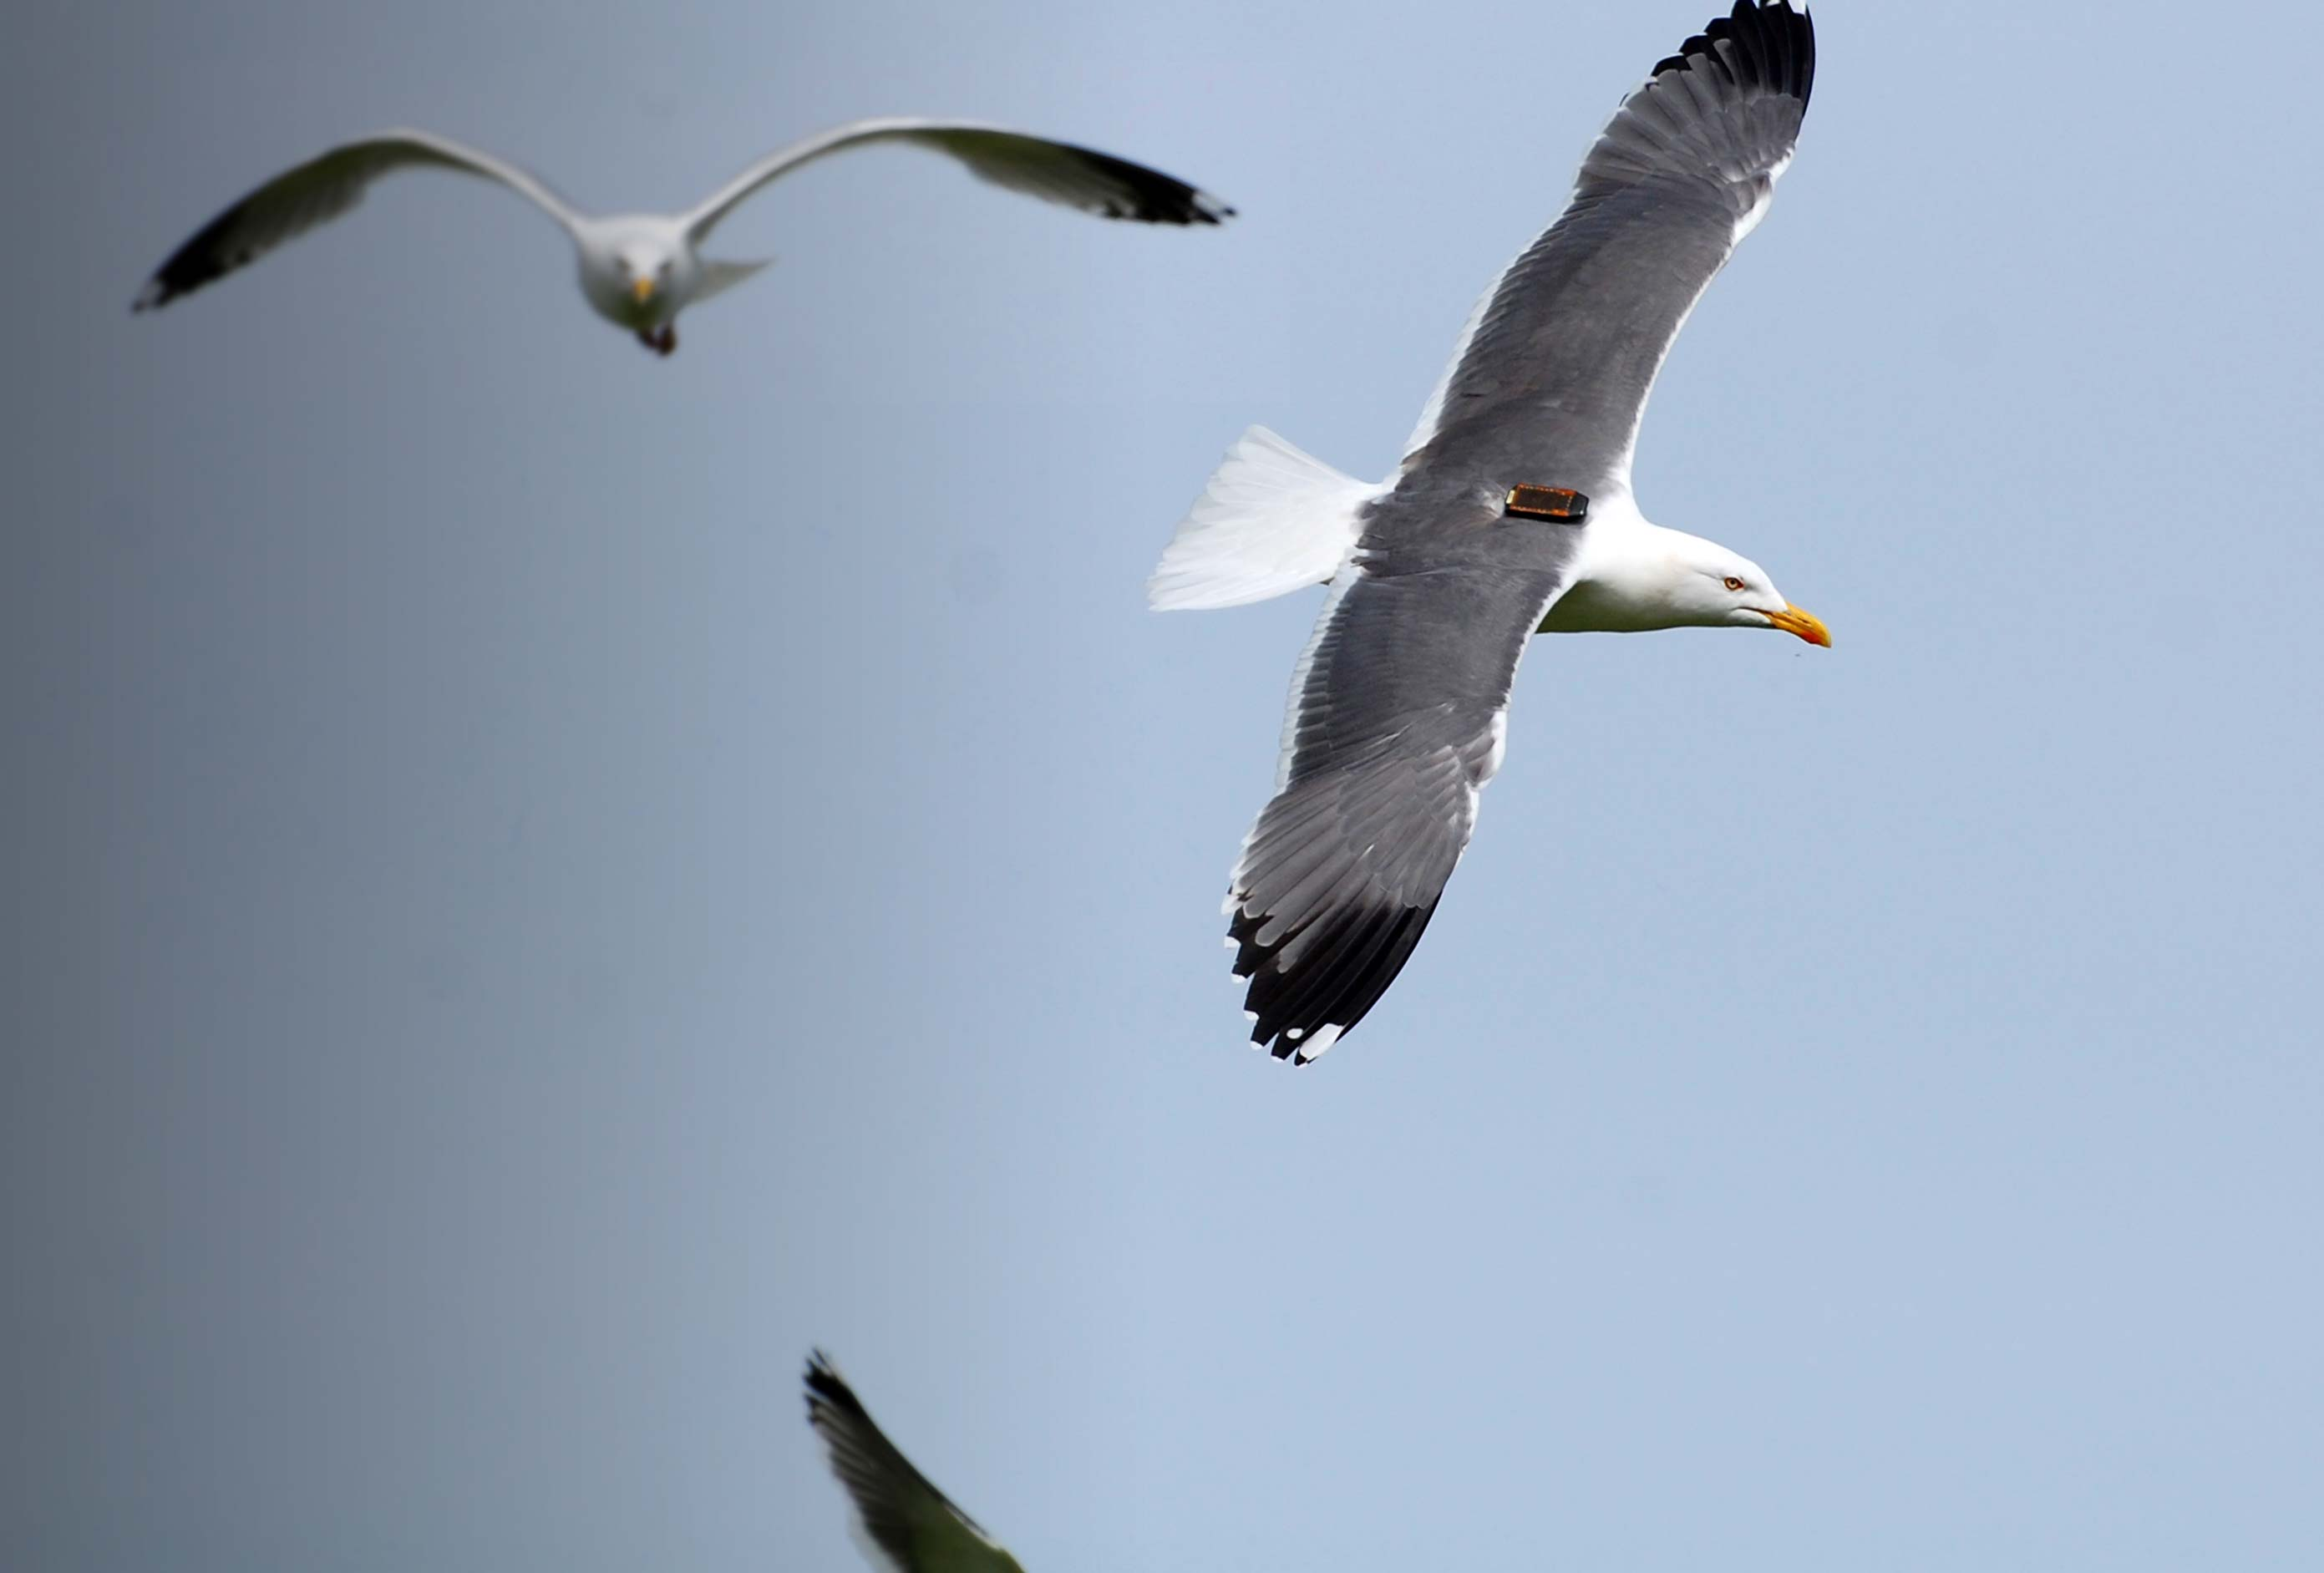

One fascinating area of research uses GPS to track the movements of animals. It is now possible to manufacture a small GPS device that is solar charged, so you don’t need to change batteries and use it to track flight patterns of birds. 
The data for this case study comes from the LifeWatch INBO project. Several data sets have been released as part of this project. We will use a small data set that consists of migration data for three gulls named Eric, Nico, and Sanne. The official_datasets; used dataset –csv file contains eight columns and includes variables like latitude, longitude, altitude, and time stamps. In this case study, we will first load the data, visualize some simple flight trajectories, track flight speed, learn about daytime, and much, much more.

    Track the movement of three gulls(birds) namely - Eric, Nico & Sanne : dataset : https://inbo.carto.com/u/lifewatch/datasets

    One fascinating area of research uses GPS to track movements of animals.
    It is now possible to manufacturer a small GPS device that is solar charged,
    so you don't need to change batteries, and use
     it to track flight patterns of birds.
    The data for this case study comes from the LifeWatch INBO project.
    Several data sets have been released as part of this project.
    We will use a small data set that consists of migration data for three
    gulls named Eric, Nico, and Sanne.
    The csv file contains eight columns, and includes variables
    like latitude, longitude, altitude, and time stamps.
    In this case study, we will first load the data,
    visualize some simple flight trajectories,
    track flight speed, learn about  daytime and much, much more.


    Aim: Track the movement of three gulls namely – Eric, Nico & Sanne
    Dataset: official_datasets; used dataset – csv 
    Dependencies: Matplotlib, Pandas, Numpy, Cartopy, Shapely
    Repository(Github): source code: https://github.com/florist-notes/Data-Analysis/tree/master/data-analysis%20project%20-%201%20-%20bird_migration_cartopy  
    (check the repository for the documentation of source code.) 
    Writeup: explanation(.pdf)

We will divide our case study into five parts: 
1. Visualizing longitude and latitude data of the gulls. 
2. Visualize the variation of the speed of the gulls. 
3. Visualize the time required by the gulls to cover equal distances over the journey. 
4. Visualize the daily mean speed of the gulls. 
5. Cartographic view of the journey of the gulls.

Data: https://www.kaggle.com/datasets/saikrishna20/bird-tracking?select=bird_tracking.csv

In [1]:
# import require liabrary

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read file 

df= pd.read_csv ('bird_tracking.csv')
df.head()

Unnamed: 0  altitude               date_time  device_info_serial  \
0           0        71  2013-08-15 00:18:08+00                 851   
1           1        68  2013-08-15 00:48:07+00                 851   
2           2        68  2013-08-15 01:17:58+00                 851   
3           3        73  2013-08-15 01:47:51+00                 851   
4           4        69  2013-08-15 02:17:42+00                 851   

    direction   latitude  longitude  speed_2d bird_name  
0 -150.469753  49.419860   2.120733  0.150000      Eric  
1 -136.151141  49.419880   2.120746  2.438360      Eric  
2  160.797477  49.420310   2.120885  0.596657      Eric  
3   32.769360  49.420359   2.120859  0.310161      Eric  
4   45.191230  49.420331   2.120887  0.193132      Eric

In [3]:
# Column & Rows
df.shape

(61920, 9)

In [4]:
# Basic dStatistics
df.describe()

Unnamed: 0      altitude  device_info_serial     direction  \
count  61920.000000  61920.000000        61920.000000  61477.000000   
mean   30959.500000     52.313275          849.328505     -4.610841   
std    17874.908671    136.435498           12.835870    102.786009   
min        0.000000  -1010.000000          833.000000   -179.997929   
25%    15479.750000      2.000000          833.000000    -89.679759   
50%    30959.500000     14.000000          851.000000    -10.983115   
75%    46439.250000     84.000000          864.000000     81.964778   
max    61919.000000   6965.000000          864.000000    180.000000   

           latitude     longitude      speed_2d  
count  61920.000000  61920.000000  61477.000000  
mean      30.227762     -8.953367      2.558987  
std       14.809813      8.478471      3.576039  
min       12.354424    -17.626145      0.000000  
25%       15.393138    -16.761302      0.410000  
50%       30.424481     -9.662089      1.209049  
75%       49.999572      2.603591      3.059444  
max       51.518452      4.857561     63.488066

In [5]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


#### Null Values:

In [6]:
# Checking ull values
df.isnull().sum()

Unnamed: 0              0
altitude                0
date_time               0
device_info_serial      0
direction             443
latitude                0
longitude               0
speed_2d              443
bird_name               0
dtype: int64

-  direction, speed_2d column having same null values which is 443             

<Axes: >

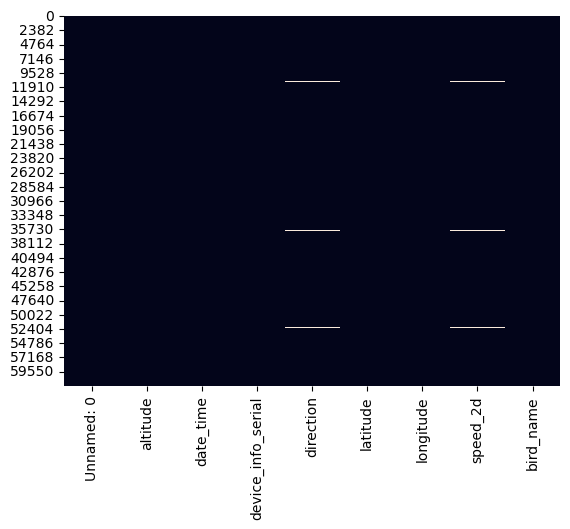

In [7]:
# Checking null values plot

sns.heatmap(df.isnull(),cbar=False)

In [8]:
# Checking null columns specific
null_data = df[df['direction'].isnull()]
bird_name_counts = null_data['bird_name'].value_counts()
bird_name_counts

bird_name
Sanne    245
Nico     113
Eric      85
Name: count, dtype: int64

In [9]:
# Null values are present in same columns and rows

#### Bird Name & Device

In [10]:
# Bird Names
df.bird_name.value_counts()

bird_name
Nico     21121
Sanne    21004
Eric     19795
Name: count, dtype: int64

-  All 3 birds Values nearly same

device_info_serial of bird

    Nico: 864  
    Sanne: 833
    Eric: 851 

In [11]:
df.columns

Index(['Unnamed: 0', 'altitude', 'date_time', 'device_info_serial',
       'direction', 'latitude', 'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

#### Date-Time 

    Que. 
    Start & End dates
    Separate> Month, Day columns
    Month wise speed
    Major/Long halts
    Start Place, end place of each birds
    Altitue/halt relation


In [12]:
# Converting into Date - Time format
df['date_time']= pd.to_datetime (df['date_time'] )
print(df.dtypes)

Unnamed: 0                          int64
altitude                            int64
date_time             datetime64[ns, UTC]
device_info_serial                  int64
direction                         float64
latitude                          float64
longitude                         float64
speed_2d                          float64
bird_name                          object
dtype: object


In [13]:
# Birds: Date Time  > min, max 
df.pivot_table(index='bird_name', values='date_time', aggfunc= ['min', 'max'])

min                       max
                          date_time                 date_time
bird_name                                                    
Eric      2013-08-15 00:18:08+00:00 2014-04-30 23:51:29+00:00
Nico      2013-08-15 00:20:45+00:00 2014-04-30 23:31:31+00:00
Sanne     2013-08-15 00:01:08+00:00 2014-04-30 23:59:34+00:00

- All 3 birds data having from  2013-08-15 to 2014-04-30 (Around 8 month data)

In [14]:
# Date_Time to Month, Day 

df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df.head()

Unnamed: 0  altitude                 date_time  device_info_serial  \
0           0        71 2013-08-15 00:18:08+00:00                 851   
1           1        68 2013-08-15 00:48:07+00:00                 851   
2           2        68 2013-08-15 01:17:58+00:00                 851   
3           3        73 2013-08-15 01:47:51+00:00                 851   
4           4        69 2013-08-15 02:17:42+00:00                 851   

    direction   latitude  longitude  speed_2d bird_name  month  day  
0 -150.469753  49.419860   2.120733  0.150000      Eric      8   15  
1 -136.151141  49.419880   2.120746  2.438360      Eric      8   15  
2  160.797477  49.420310   2.120885  0.596657      Eric      8   15  
3   32.769360  49.420359   2.120859  0.310161      Eric      8   15  
4   45.191230  49.420331   2.120887  0.193132      Eric      8   15

In [15]:
df.columns

Index(['Unnamed: 0', 'altitude', 'date_time', 'device_info_serial',
       'direction', 'latitude', 'longitude', 'speed_2d', 'bird_name', 'month',
       'day'],
      dtype='object')

#### Altitude

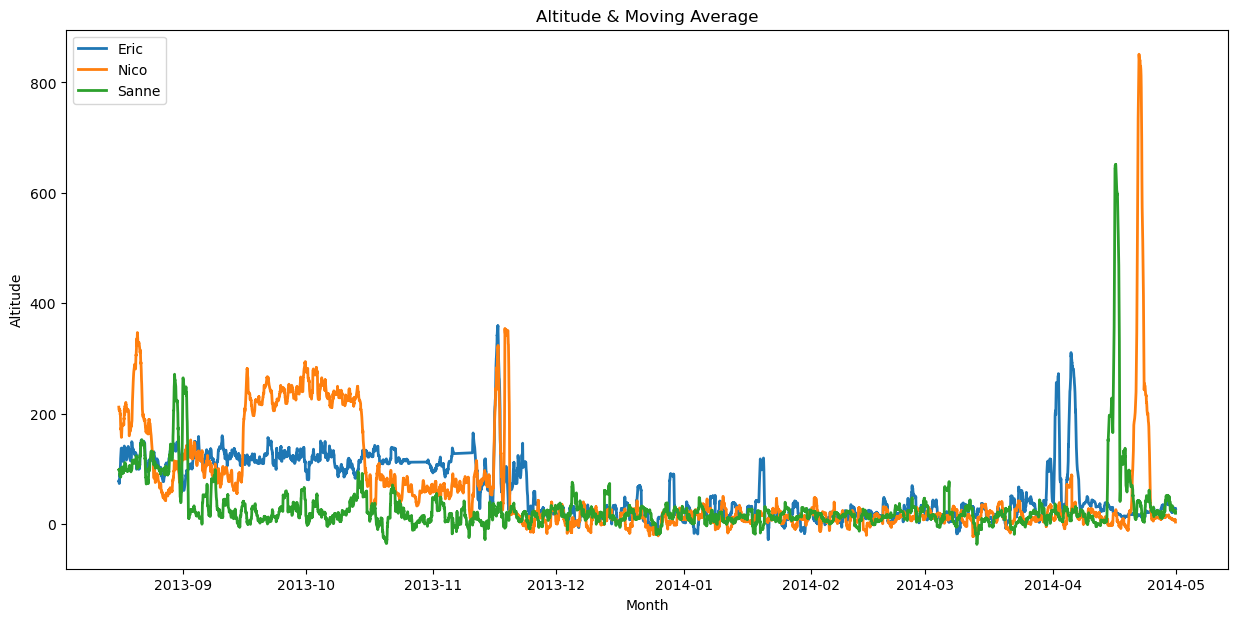

In [16]:
# Birds & Altitude
# List of birds
birds= df['bird_name'].unique()

# Create Plot of 3 birds and their Altitude 
plt.figure(figsize=(15,7))

# Loop for analyse all bird data
for i in birds:
    bird_data = df[df['bird_name']== i] 
    bird_data ['avg_100']  = bird_data ['altitude'].rolling(window=100).mean()    # Moving Average
    sns.lineplot(x=bird_data.date_time, y=bird_data['avg_100'], label=f'{i}', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Altitude')
plt.title('Altitude & Moving Average')
plt.show()

In [17]:
bird_data.head()

Unnamed: 0  altitude                 date_time  device_info_serial  \
40916       40916        55 2013-08-15 00:01:08+00:00                 833   
40917       40917        54 2013-08-15 00:31:00+00:00                 833   
40918       40918        55 2013-08-15 01:01:19+00:00                 833   
40919       40919        56 2013-08-15 01:31:38+00:00                 833   
40920       40920        55 2013-08-15 02:01:24+00:00                 833   

        direction   latitude  longitude  speed_2d bird_name  month  day  \
40916  -91.499509  49.931065   2.281893  0.372156     Sanne      8   15   
40917 -141.804053  49.931076   2.281900  1.318484     Sanne      8   15   
40918  -10.651840  49.931016   2.281933  0.076158     Sanne      8   15   
40919   14.727689  49.931053   2.281911  0.014142     Sanne      8   15   
40920 -169.882200  49.931042   2.281893  0.094340     Sanne      8   15   

       avg_100  
40916      NaN  
40917      NaN  
40918      NaN  
40919      NaN  
40920      NaN

In [18]:
df.columns

Index(['Unnamed: 0', 'altitude', 'date_time', 'device_info_serial',
       'direction', 'latitude', 'longitude', 'speed_2d', 'bird_name', 'month',
       'day'],
      dtype='object')

In [19]:
# Birds wise max, average altitude

birds_alt = pd.pivot_table (data=df, index='bird_name', values= 'altitude', aggfunc= ['max', 'mean', 'min'])
birds_alt

max       mean      min
          altitude   altitude altitude
bird_name                             
Eric          4808  60.249406     -830
Nico          6965  67.900478     -965
Sanne         6145  29.159922    -1010

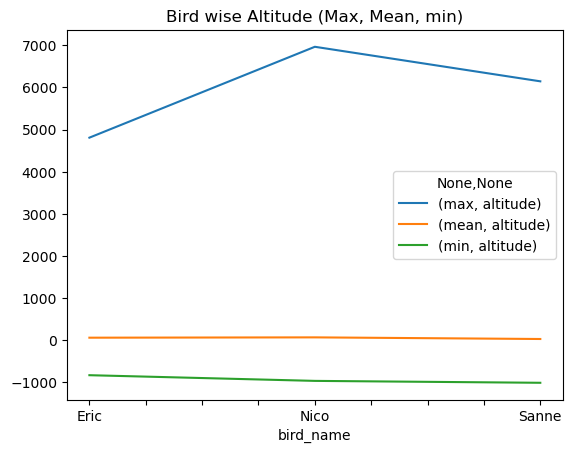

In [32]:
birds_alt.plot.line()
plt.title('Bird wise Altitude (Max, Mean, min)')
plt.show()

#### Lat-long
Distance traveled by birds avg month

In [21]:
df.head()

Unnamed: 0  altitude                 date_time  device_info_serial  \
0           0        71 2013-08-15 00:18:08+00:00                 851   
1           1        68 2013-08-15 00:48:07+00:00                 851   
2           2        68 2013-08-15 01:17:58+00:00                 851   
3           3        73 2013-08-15 01:47:51+00:00                 851   
4           4        69 2013-08-15 02:17:42+00:00                 851   

    direction   latitude  longitude  speed_2d bird_name  month  day  
0 -150.469753  49.419860   2.120733  0.150000      Eric      8   15  
1 -136.151141  49.419880   2.120746  2.438360      Eric      8   15  
2  160.797477  49.420310   2.120885  0.596657      Eric      8   15  
3   32.769360  49.420359   2.120859  0.310161      Eric      8   15  
4   45.191230  49.420331   2.120887  0.193132      Eric      8   15

In [22]:
# Create the GeoDataFrame: Convert lat long to Geometry format which suitable for geopandas
dfg= gpd.GeoDataFrame (df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

# Set  CRS 
dfg.crs = 'epsg:4326'

In [23]:
# Importing world dataset 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


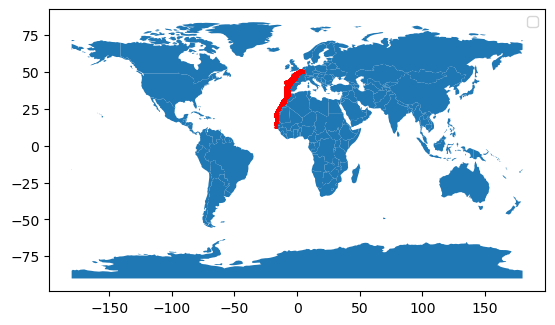

In [24]:
# bird migration over world map
dfg.plot(ax=world.plot(), color='red', markersize= 1)
plt.legend()
plt.show()

- Now understading where this migration is, but not understanding where it started & where it ended

In [25]:
# Start and end point

# GeoDataFrame showing starting point for each bird
start_df = dfg.groupby("bird_name")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}
start_gdf

bird_name                  geometry
0      Eric  POINT (2.12073 49.41986)
1      Nico  POINT (4.39451 50.21345)
2     Sanne  POINT (2.28189 49.93106)

In [26]:
# GeoDataFrame showing Enidng point for each bird
end_df = dfg.groupby("bird_name")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_df = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_df.crs = {'init' :'epsg:4326'}
end_df

bird_name                  geometry
0      Eric  POINT (3.21630 51.32299)
1      Nico  POINT (3.17646 51.34990)
2     Sanne  POINT (3.18106 51.35447)

In [27]:
# Line (start-end)
from shapely.geometry import Point, LineString

path_df = dfg.groupby("bird_name")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init' :'epsg:4326'}
path_gdf

bird_name                                           geometry
0      Eric  LINESTRING (2.12073 49.41986, 2.12075 49.41988...
1      Nico  LINESTRING (4.39451 50.21345, 4.39401 50.21412...
2     Sanne  LINESTRING (2.28189 49.93106, 2.28190 49.93108...

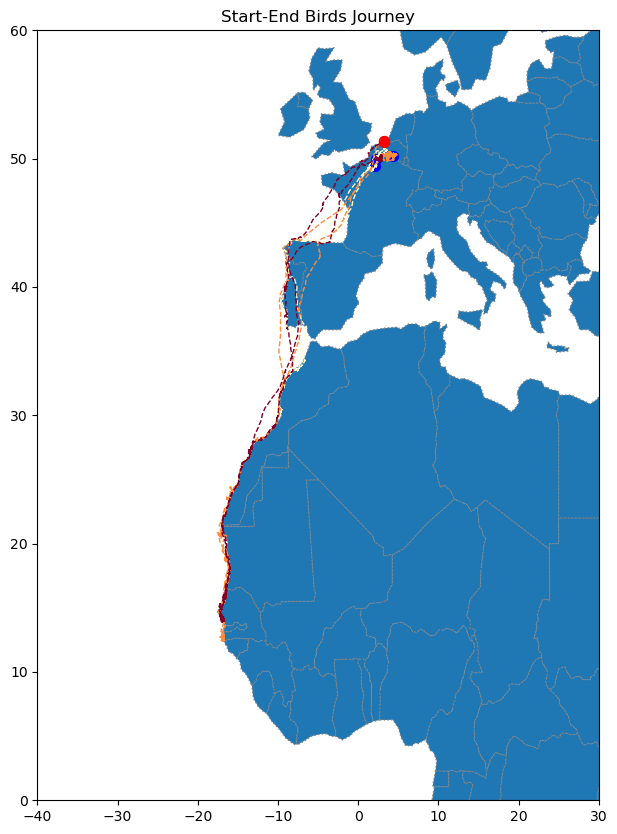

In [28]:
# Zoom by extend of required area

ax = world.plot(figsize=(20,10), linestyle=':', edgecolor='gray') 
start_gdf.plot(ax=ax, color='Blue',  markersize=50)
path_gdf.plot(ax=ax, cmap='YlOrRd', linestyle='--', linewidth=1, zorder=1)
end_df.plot(ax=ax, color='Red', markersize=50)
ax.set_xlim(-40, 30)
ax.set_ylim(0, 60)
plt.title('Start-End Birds Journey')
plt.show()

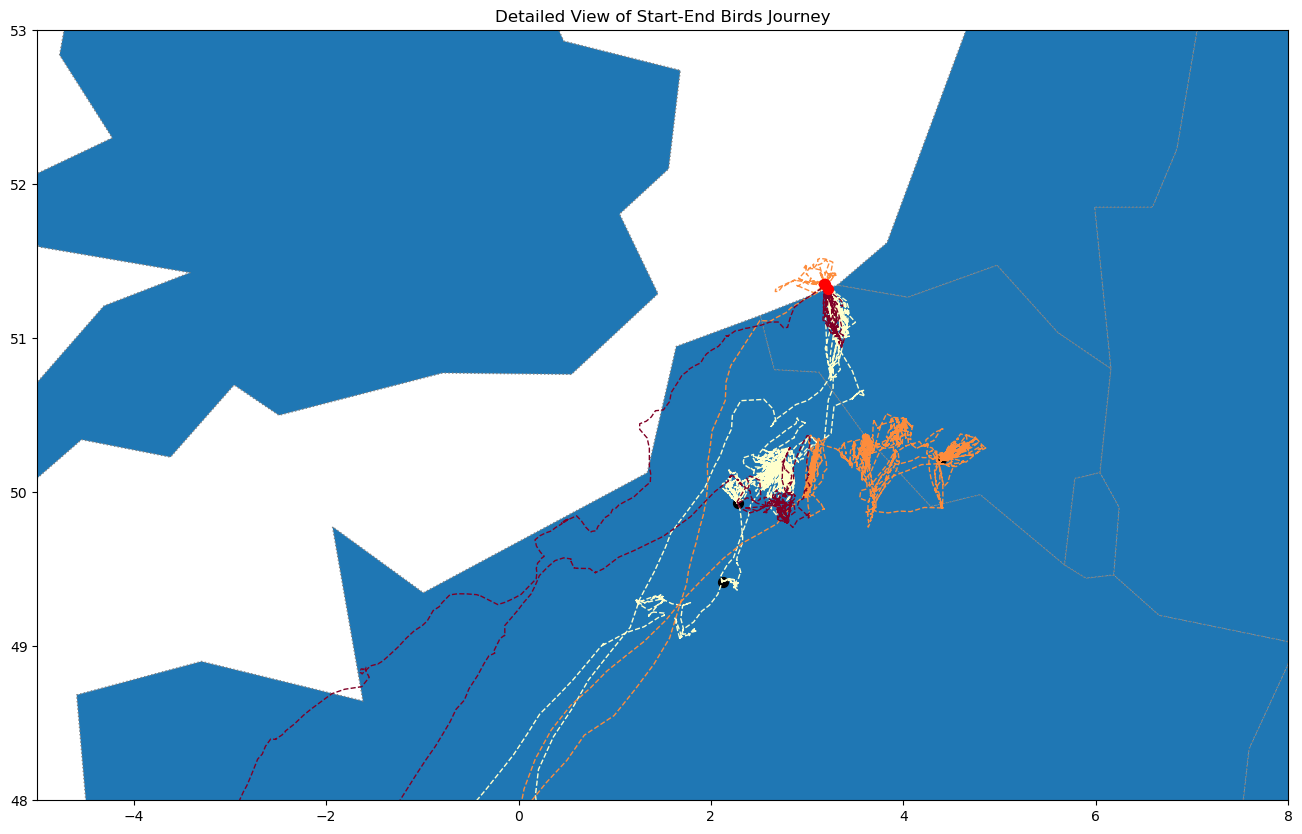

In [29]:
# Detailed Zoom by extend of required area for undestanding the startiiing points

ax = world.plot(figsize=(20,10), linestyle=':', edgecolor='gray') 
start_gdf.plot(ax=ax, color='Black',  markersize=50)
path_gdf.plot(ax=ax, cmap='YlOrRd', linestyle='--', linewidth=1, zorder=1)
end_df.plot(ax=ax, color='Red', markersize=50)
ax.set_xlim(-5, 8)
ax.set_ylim(48, 53)
plt.title('Detailed View of Start-End Birds Journey')
plt.show()

In [30]:
import folium

In [31]:
map_fol= folium.Map(tiles='OpenStreetMap', location=[50,3], zoom_start=7)
start= folium.GeoJson(start_gdf.to_json(), popup='Red').add_to(map_fol)
end= folium.GeoJson(end_df.to_json()).add_to(map_fol)
path=folium.GeoJson(path_gdf.to_json()).add_to(map_fol)
map_fol